In [3]:
import pandas as pd

# Path to the dataset
file_path = '/content/supUpdated (1).xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values
df = df.dropna()  # Dropping rows with missing values, could also use imputation

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


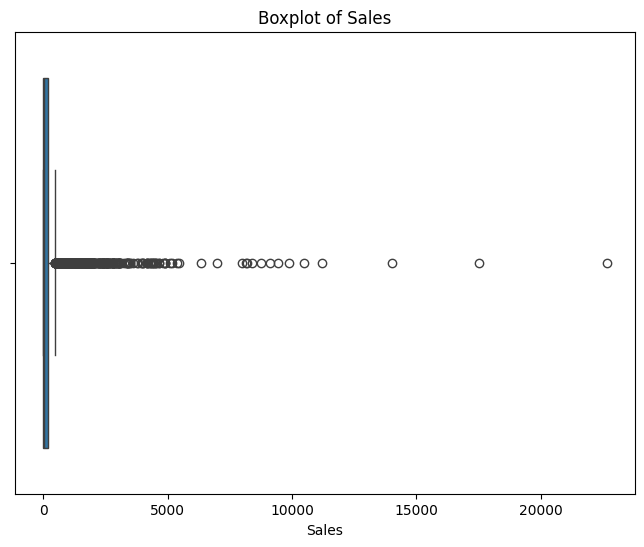

Outliers identified using statistical methods:
27      3083.430
165     8159.952
251     3347.370
262     3059.982
263     2519.958
          ...   
9741    4404.900
9774    2177.584
9857    3393.680
9929    2799.960
9948    2405.200
Name: Sales, Length: 127, dtype: float64

Cleaned data after removing outliers:
0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9867, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (assuming df is already loaded and cleaned)
# For the purpose of this example, let's consider 'Sales' column as our feature
sales_data = df['Sales']

# Method 1: Statistical Methods
mean_sales = sales_data.mean()
std_sales = sales_data.std()
threshold = 3 * std_sales  # Adjust the threshold as needed

outliers_statistical = sales_data[abs(sales_data - mean_sales) > threshold]

# Method 2: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=sales_data)
plt.title("Boxplot of Sales")
plt.show()

# Method 3: Removing Outliers
# Remove outliers based on statistical methods
cleaned_sales_data = sales_data[~sales_data.isin(outliers_statistical)]

# Display the outliers
print("Outliers identified using statistical methods:")
print(outliers_statistical)

# Display the cleaned data
print("\nCleaned data after removing outliers:")
print(cleaned_sales_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


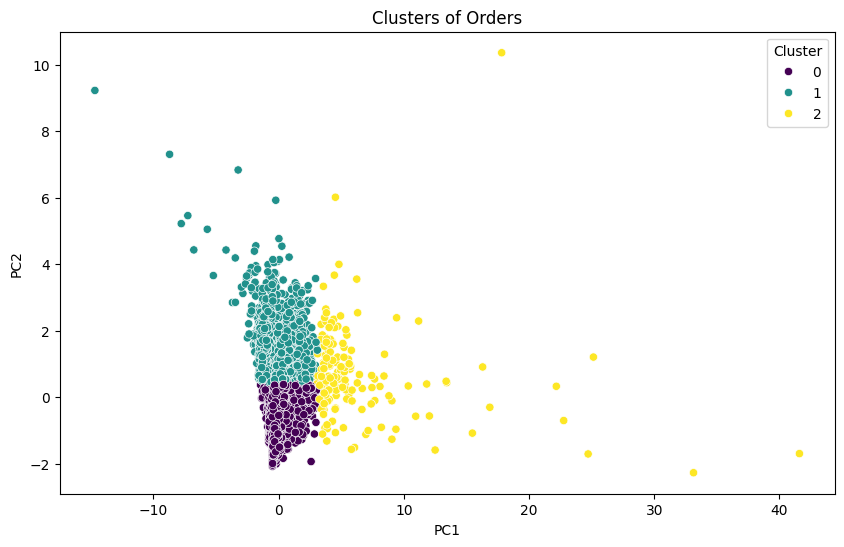

               Sales      Profit
Cluster                         
0         144.499996   28.599456
1         268.920926  -27.072622
2        3367.390265  946.264813
                Sales                                   Profit  \
Category    Furniture Office Supplies   Technology   Furniture   
Cluster                                                          
0          234.512345       88.413928   235.956588   27.308404   
1          463.757429      117.164497   506.522677  -53.046675   
2         2479.800282     3170.127391  3934.794182  426.625759   

                                       
Category Office Supplies   Technology  
Cluster                                
0              22.210973    51.024885  
1             -16.006248   -25.523486  
2            1061.509561  1140.611108  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Feature engineering: extracting useful features from dates
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day

# Selecting relevant features for clustering
features = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month', 'Order_Day']]
features_scaled = StandardScaler().fit_transform(features)

# Applying PCA for dimensionality reduction (optional but helps with visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components)
pca_df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters of Orders')
plt.show()

# Adding cluster information to the original dataframe
df['Cluster'] = clusters

# Analyzing clusters for insights
# Example: Average sales and profit per cluster
cluster_analysis = df.groupby('Cluster')[['Sales', 'Profit']].mean()
print(cluster_analysis)

# Example: Sales and Profit by Category in each cluster
cluster_category_analysis = df.groupby(['Cluster', 'Category'])[['Sales', 'Profit']].mean().unstack()
print(cluster_category_analysis)

# Save the DataFrame with cluster info to a new Excel file
df.to_excel('/content/Sample - Superstore with Clusters.xlsx', index=False)


Accuracy: 0.9814907453726863
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       188
           1       0.98      0.99      0.99       595
           2       0.96      0.94      0.95       342
           3       0.99      1.00      0.99       868
           4       1.00      0.50      0.67         6

    accuracy                           0.98      1999
   macro avg       0.98      0.88      0.91      1999
weighted avg       0.98      0.98      0.98      1999



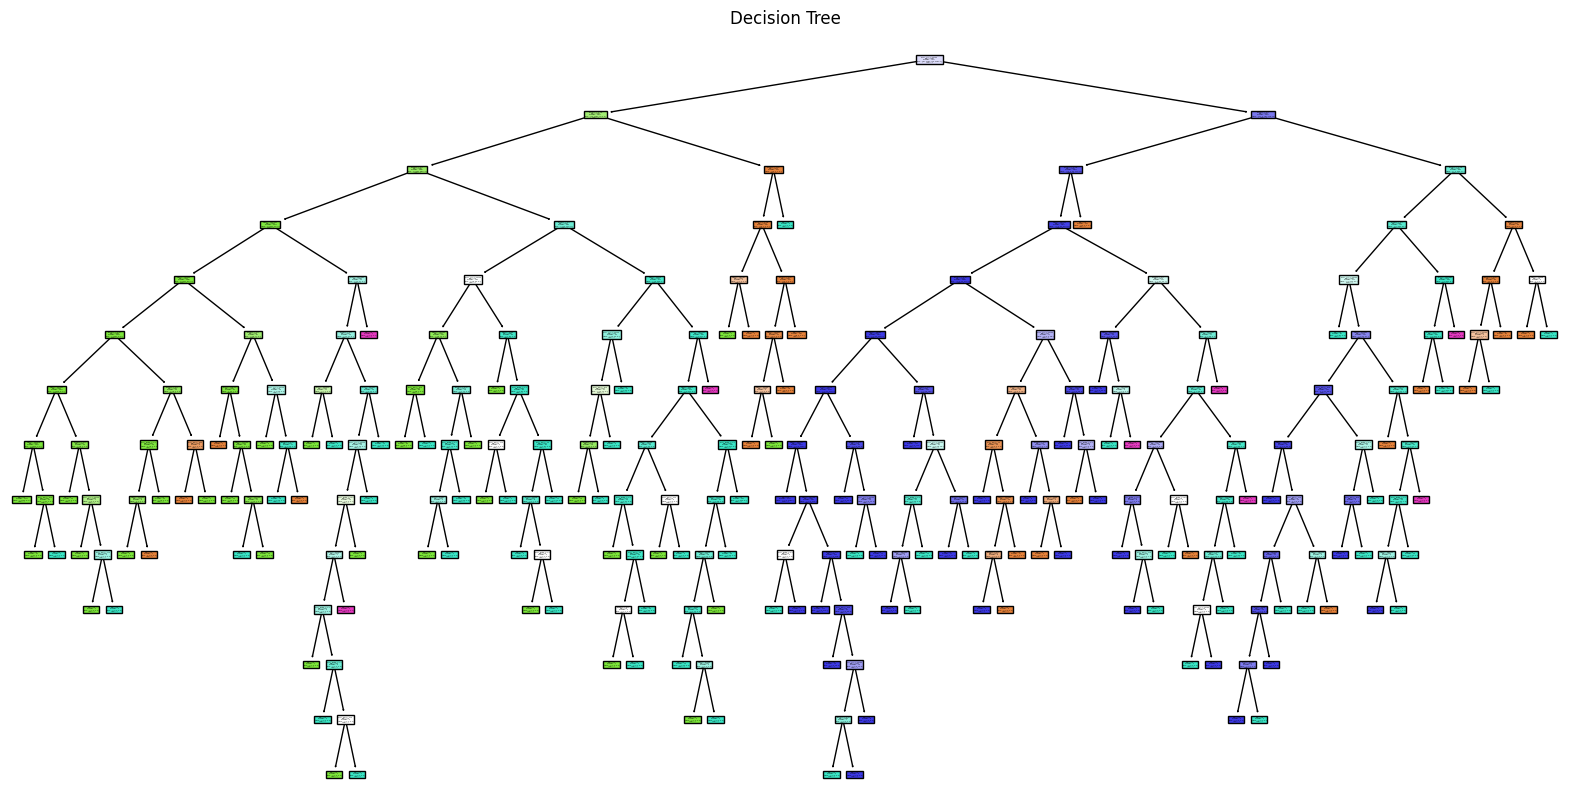

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded and cleaned in df
# Selecting relevant features and the target variable for the decision tree
features = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month', 'Order_Day']]
target = df['Cluster']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=features.columns, class_names=[str(i) for i in np.unique(target)], filled=True)
plt.title("Decision Tree")
plt.show()


In [ ]:
pip install mlxtend


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset (assuming df is already loaded and cleaned)
# For the purpose of this example, let's assume 'Product Name' is what we are interested in for itemsets
basket = df.groupby(['Order ID', 'Product Name'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID')

# Convert quantities to a one-hot encoding (presence/absence of an item)
basket = basket.applymap(lambda x: 2 if x > 0 else 0).astype(bool)

# Use the Apriori algorithm to calculate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Check if any frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the min_support threshold.")
else:
    # Generate the association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Display the frequent itemsets
    print("Frequent Itemsets:")
    print(frequent_itemsets)

    # Display the association rules
    print("\nAssociation Rules:")
    print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
    support             itemsets
0  0.009183  (Easy-staple paper)
1  0.009583    (Staple envelope)
2  0.009183            (Staples)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.9814907453726863
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       188
           1       0.98      0.99      0.99       595
           2       0.96      0.94      0.95       342
           3       0.99      1.00      0.99       868
           4       1.00      0.50      0.67         6

    accuracy                           0.98      1999
   macro avg       0.98      0.88      0.91      1999
weighted avg       0.98      0.98      0.98      1999

Confusion Matrix:
 [[182   1   2   3   0]
 [  0 591   4   0   0]
 [  5   9 322   6   0]
 [  0   0   4 864   0]
 [  1   0   2   0   3]]


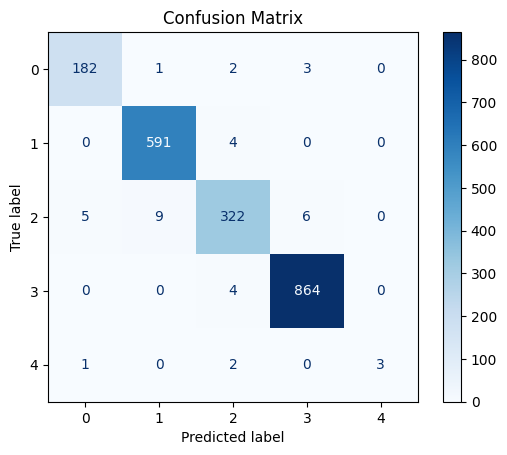

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded and cleaned in df
# Selecting relevant features and the target variable for the decision tree
features = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month', 'Order_Day']]
target = df['Cluster']  # The cluster labels assigned by KMeans

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Load the dataset (assuming df is already loaded and cleaned)
# For the purpose of this example, let's consider 'Sales' column as our feature
features = df[['Sales']]

# Fit k-NN model
k = 5  # Number of neighbors
knn = NearestNeighbors(n_neighbors=k)
knn.fit(features)

# Calculate distances to k nearest neighbors
distances, _ = knn.kneighbors(features)

# Calculate outlier scores
outlier_scores = distances.max(axis=1)

# Define a threshold for identifying outliers
threshold = np.percentile(outlier_scores, 95)  # Adjust as needed

# Identify outliers
outliers_knn = features[outlier_scores > threshold]

# Display outliers
print("Outliers identified using k-NN:")
print(outliers_knn)


Outliers identified using k-NN:
          Sales
1      731.9400
3      957.5775
7      907.1520
10    1706.1840
24    1044.6300
...         ...
9866  1085.4200
9876   848.5440
9947  1925.8800
9948  2405.2000
9968   735.9800

[500 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate total purchase amount for each customer
total_purchase_amount = df.groupby('Customer ID')['Sales'].sum().reset_index()
total_purchase_amount.rename(columns={'Sales': 'Total Purchase Amount'}, inplace=True)  # Rename the column

# Merge the total purchase amount with the original DataFrame
df = pd.merge(df, total_purchase_amount, on='Customer ID')

# Sort customers by total purchase amount to find the "best consumers"
best_consumers = df.sort_values(by='Total Purchase Amount', ascending=False).head(100)  # Select top 100 best consumers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'Target Variable'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


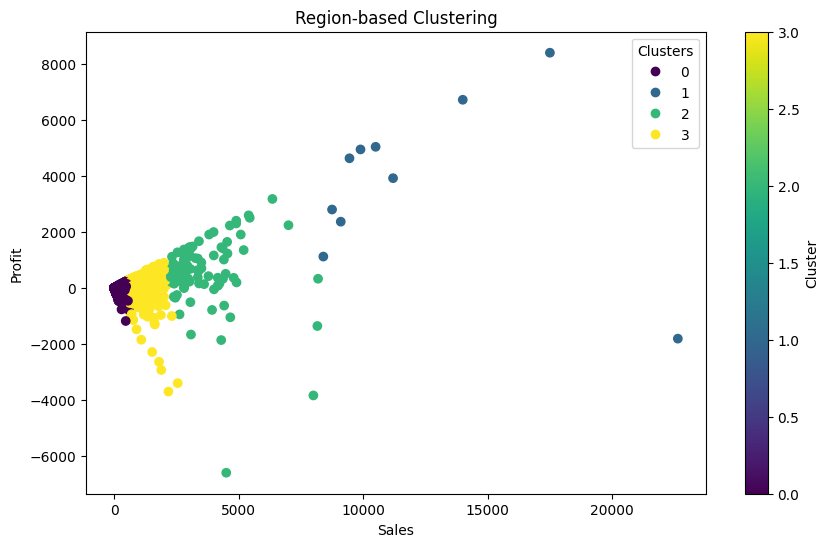

              Row ID   Postal Code         Sales  Quantity  Discount  \
Cluster                                                                
0        5016.758683  55357.361920     96.202497  3.615488  0.158004   
1        5682.600000  36160.800000  12143.087400  5.600000  0.110000   
2        5224.705357  49567.589286   3418.757059  6.285714  0.120268   
3        4788.635897  54507.717949    960.980084  5.072821  0.144369   

              Profit   Sales_total   Sales_total   Sales_total   Sales_total  \
Cluster                                                                        
0          10.897528   3460.413848   3460.413848   3460.413848   3460.413848   
1        3813.166090  15013.759300  15013.759300  15013.759300  15013.759300   
2         572.424873   6982.302638   6982.302638   6982.302638   6982.302638   
3          89.434330   4303.512998   4303.512998   4303.512998   4303.512998   

         Total Purchase Amount_x  Total Purchase Amount_y  \
Cluster                  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded

# Selecting features for clustering, including the 'Region' column
features = df[['Region', 'Sales', 'Profit']]  # Add more features as needed

# One-hot encode the 'Region' column
one_hot_encoder = OneHotEncoder()
encoded_region = one_hot_encoder.fit_transform(features[['Region']]).toarray()

# Create a DataFrame with the encoded region data
encoded_region_df = pd.DataFrame(encoded_region, columns=one_hot_encoder.get_feature_names_out(['Region']))

# Retrieve the original region names from the OneHotEncoder
region_names = one_hot_encoder.categories_[0]

# Concatenate the encoded region data with the original features
features = pd.concat([encoded_region_df, features[['Sales', 'Profit']]], axis=1)

# Perform clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Map cluster labels to region names
cluster_region_mapping = {cluster: region for cluster, region in zip(range(len(region_names)), region_names)}
df['Cluster Region'] = df['Cluster'].map(cluster_region_mapping)

# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Sales'], df['Profit'], c=clusters, cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Region-based Clustering')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster characteristics, selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)
